In [1]:
pip install praat-parselmouth

Note: you may need to restart the kernel to use updated packages.


In [3]:
import librosa
import numpy as np


In [5]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

In [6]:
def amplitude(audio_path , title):
  snd = parselmouth.Sound(audio_path)
  plt.figure()
  plt.plot(snd.xs(), snd.values.T)
  plt.xlim([snd.xmin, snd.xmax])
  plt.xlabel("time [s]")
  plt.ylabel("amplitude")
  plt.title(title)
  plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [7]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

In [8]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

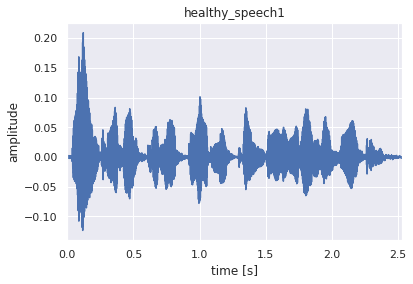

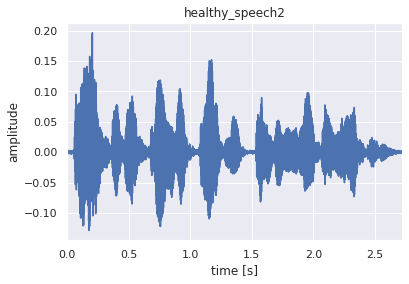

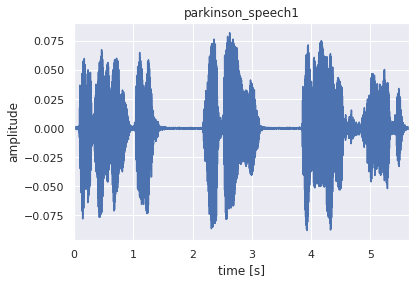

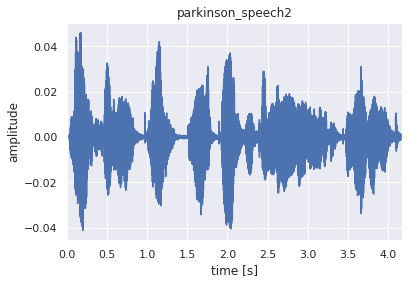

In [9]:
#amplitude
healthy_speech1 = "hc1.wav"
pd_speech1 = "pd1.wav"
healthy_speech2 = "hc2.wav"
pd_speech2 = "pd2.wav"

amplitude(healthy_speech1 , "healthy_speech1")
amplitude(healthy_speech2 , "healthy_speech2")
amplitude(pd_speech1 , "parkinson_speech1")
amplitude(pd_speech2 , "parkinson_speech2")


In [10]:
# intensity
def intensity(audio_path , title):
  snd = parselmouth.Sound(audio_path)
  intensity = snd.to_intensity()
  spectrogram = snd.to_spectrogram()
  plt.figure()
  draw_spectrogram(spectrogram)
  plt.twinx()
  draw_intensity(intensity)
  plt.xlim([snd.xmin, snd.xmax])
  plt.title(title)
  plt.savefig(title) # or plt.savefig("spectrogram.pdf")

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


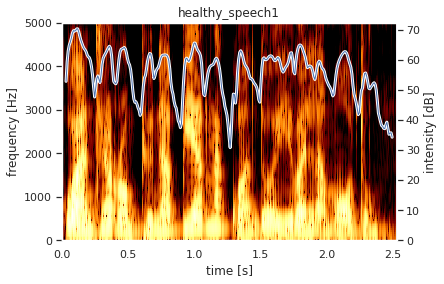

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


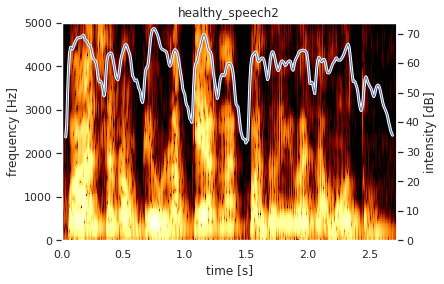

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


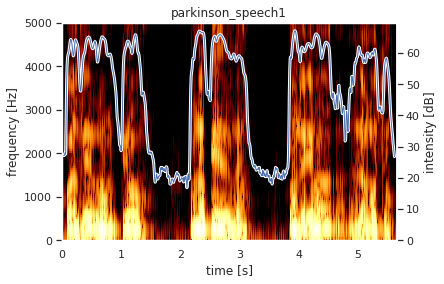

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


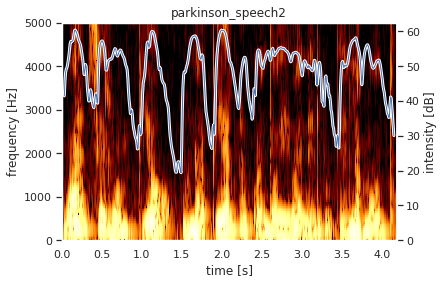

In [11]:
intensity(healthy_speech1 , "healthy_speech1")
intensity(healthy_speech2 , "healthy_speech2")
intensity(pd_speech1 , "parkinson_speech1")
intensity(pd_speech2 , "parkinson_speech2")

In [12]:
#formant frequencies

def pitch(audio_path , title):
  snd = parselmouth.Sound(audio_path)
  pitch = snd.to_pitch()
  # If desired, pre-emphasize the sound fragment before calculating the spectrogram
  pre_emphasized_snd = snd.copy()
  pre_emphasized_snd.pre_emphasize()
  spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
  plt.figure()
  draw_spectrogram(spectrogram)
  plt.twinx()
  draw_pitch(pitch)
  plt.xlim([snd.xmin, snd.xmax])
  plt.title(title)
  plt.show() # or plt.savefig("spectrogram_0.03.pdf")

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


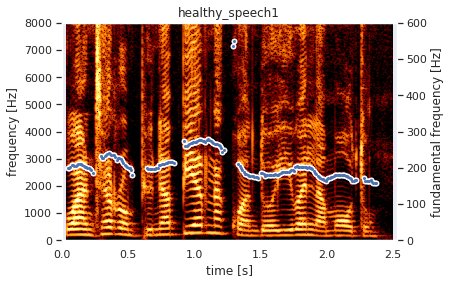

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


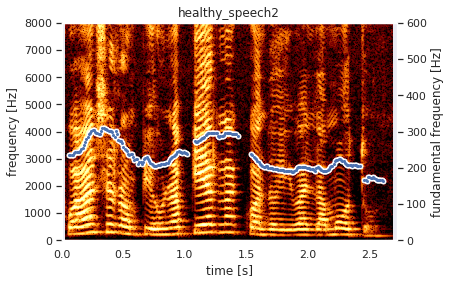

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


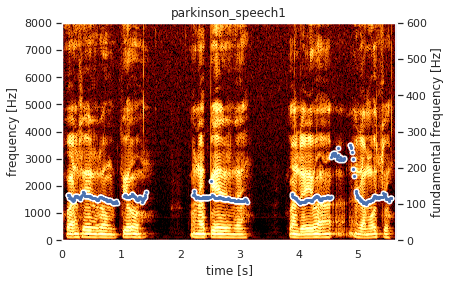

<ipython-input-7-57b799a38aca>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


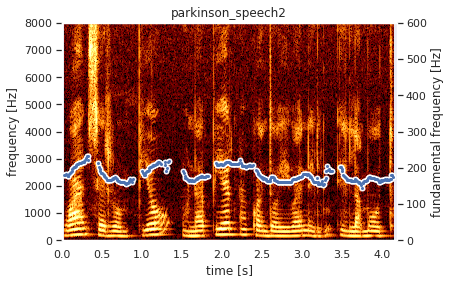

In [13]:
pitch(healthy_speech1 , "healthy_speech1")
pitch(healthy_speech2 , "healthy_speech2")
pitch(pd_speech1 , "parkinson_speech1")
pitch(pd_speech2 , "parkinson_speech2")

In [14]:
def pulse(audio_path):
  snd = parselmouth.Sound(audio_path)
  pitch_num = snd.to_pitch()
  pulses = parselmouth.praat.call([snd, pitch_num], "To PointProcess (cc)")
  n_pulses = parselmouth.praat.call(pulses, "Get number of points")
  return n_pulses

In [15]:
print(pulse(healthy_speech1))
print(pulse(pd_speech1))
print(pulse(healthy_speech2))
print(pulse(pd_speech2))

414
463
559
633


In [16]:
def shimmer(audio_path):
  snd = parselmouth.Sound(audio_path)
  pitch_num = snd.to_pitch()
  pulses = parselmouth.praat.call([snd, pitch_num], "To PointProcess (cc)")
  shimmer_local = parselmouth.praat.call([snd, pulses], "Get shimmer (local)...", 0.0, 0.0, 0.0001, 0.02, 1.3, 1.6)
  print(shimmer_local)

In [17]:
shimmer(healthy_speech1)
shimmer(pd_speech1)
shimmer(healthy_speech2)
shimmer(pd_speech2)

0.1063794946134317
0.10205884586443927
0.1286310840916692
0.10730508293058043


In [18]:
def quantile(audio_path):
  snd = parselmouth.Sound(audio_path)
  pitch = snd.to_pitch()
  return parselmouth.praat.call(pitch, "Get quantile", 0.0, 0.0, 0.5, "Hertz")
  

In [19]:
print(quantile(healthy_speech1))
print(quantile(pd_speech1))
print(quantile(healthy_speech2))
print(quantile(pd_speech2))


199.4951093920974
116.81266324391638
221.72763240807882
174.192727404289
